In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/"Summer Research"/code

/content/drive/.shortcut-targets-by-id/1EO5BL-KdimX9UZnIrGpBG2tYVecvK7hr/Summer Research/code


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

KNN1 = KNeighborsClassifier(n_neighbors=1)
KNN3 = KNeighborsClassifier(n_neighbors=3)
KNN11 = KNeighborsClassifier(n_neighbors=11)

randomForest1 = RandomForestClassifier(n_estimators=1)
randomForest5 = RandomForestClassifier(n_estimators=5)
randomForest10 = RandomForestClassifier(n_estimators=10)
randomForest25 = RandomForestClassifier(n_estimators=25)
randomForest100 = RandomForestClassifier(n_estimators=100)

naiveBayesClassifier = GaussianNB()
adaboostClassifier = AdaBoostClassifier()
gradientBoostingClassifier = GradientBoostingClassifier()
decisionTreeClassifier = DecisionTreeClassifier()
quadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis()
logisticRegression = LogisticRegression(max_iter=500)
SGDClassifier_hinge = SGDClassifier()
SGDClassifier_log = SGDClassifier(loss='log')
SVC_linear_kernel = SVC(kernel="linear")
SVC_linear = LinearSVC()
SVC_rbf = SVC()
MLPclf_1 = MLPClassifier(max_iter=500)
MLPclf_3 = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500)
#decision tree (random state = 42)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, a,b, model_name, path, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")

    # Reduces to the first two columns of data
    reduced_data = X[:, a:b+1]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, a].min() - 1, X[:, a].max() + 1
    y_min, y_max = X[:, b].min() - 1, X[:, b].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, a], X[:, b], c=y, alpha=0.8)
    plt.xlabel("Feature-" + str(a),fontsize=15)
    plt.ylabel("Feature-" + str(b),fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(model_name)
    plt.savefig(path)
    return plt

#SGDClassifier hinge

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

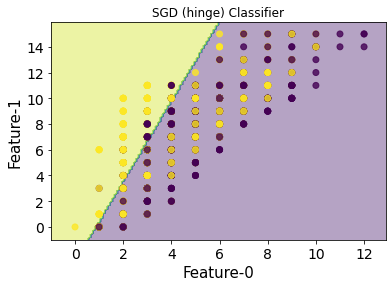

In [ ]:
#0th and 1st features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y,SGDClassifier, 0, 1, "SGD (hinge) Classifier", "./decision boundaries/eye/SGDClassifier_hinge_0_1.pdf")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

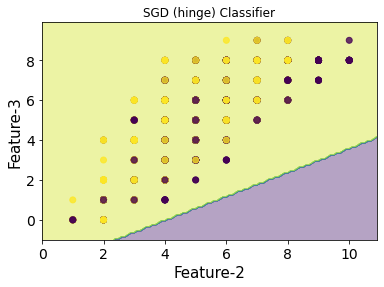

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, SGDClassifier,2,3, "SGD (hinge) Classifier", "./decision boundaries/eye/SGDClassifier_hinge_2_3.pdf")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

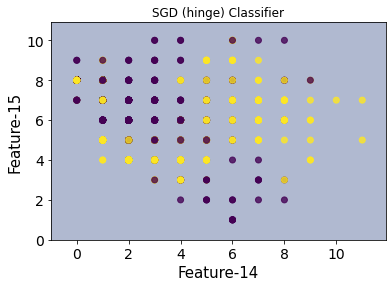

In [ ]:
#14th and 15th features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, SGDClassifier, 14,15, "SGD (hinge) Classifier", "./decision boundaries/eye/SGDClassifier_hinge_14_15.pdf")

#SGDClassifier log

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

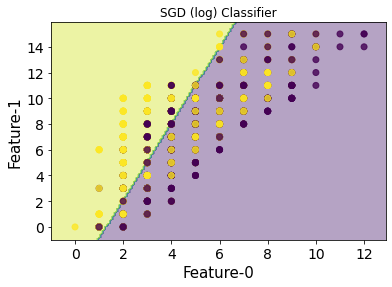

In [ ]:
#0th and 1st features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, SGDClassifier ,0,1, "SGD (log) Classifier", "./decision boundaries/eye/SGDClassifier_log_0_1.pdf", loss='log')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

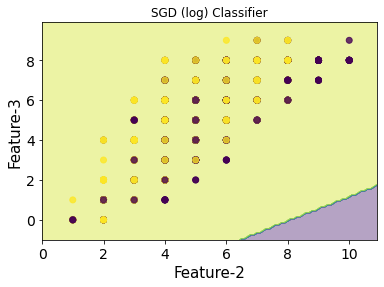

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, SGDClassifier, 2,3, "SGD (log) Classifier","./decision boundaries/eye/SGDClassifier_log_2_3", loss='log')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

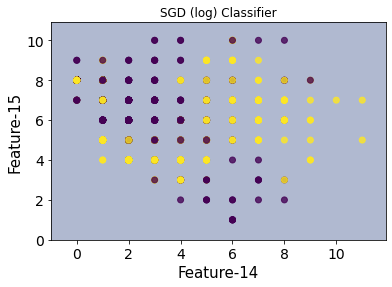

In [ ]:
#14th and 15th features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, SGDClassifier, 14,15, "SGD (log) Classifier","./decision boundaries/eye/SGDClassifier_log_14_15.pdf", loss='log')

#randomForest and decision tree

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

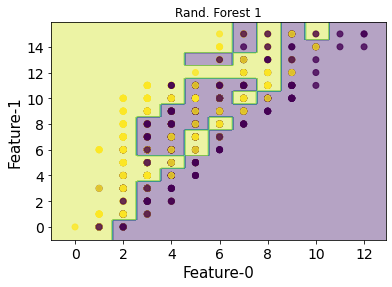

In [ ]:
#0th and 1st features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, RandomForestClassifier, 0,1, "Rand. Forest 1","./decision boundaries/eye/rf1_0_1.pdf", n_estimators=1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

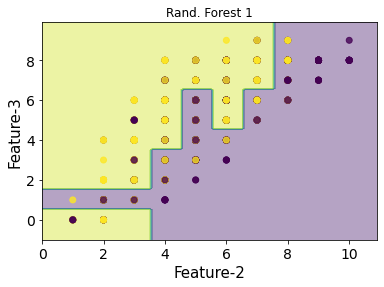

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, RandomForestClassifier, 2,3,"Rand. Forest 1","./decision boundaries/eye/rf1_2_3.pdf", n_estimators=1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

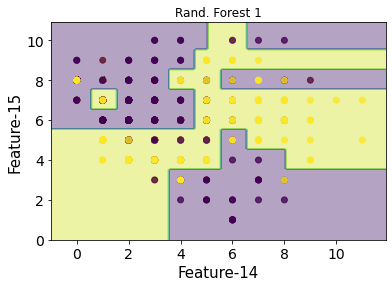

In [ ]:
#14th and 15th features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, RandomForestClassifier, 14,15,"Rand. Forest 1","./decision boundaries/eye/rf1_14_15.pdf", n_estimators=1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

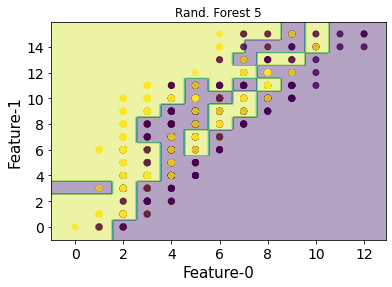

In [ ]:
#0th and 1st features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, RandomForestClassifier, 0, 1,"Rand. Forest 5","./decision boundaries/eye/rf5_0_1.pdf", n_estimators=5)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

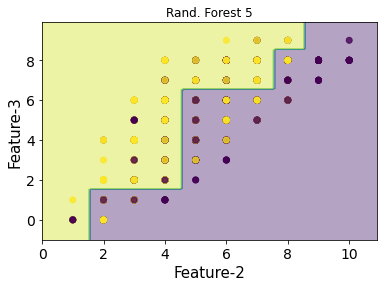

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, RandomForestClassifier, 2,3,"Rand. Forest 5","./decision boundaries/eye/rf5_2_3.pdf", n_estimators=5)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

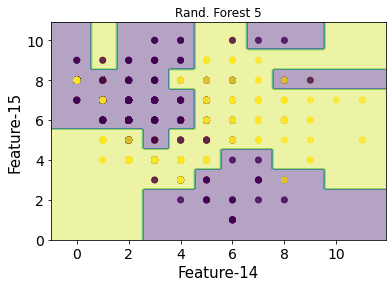

In [ ]:
#14th and 15th features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, RandomForestClassifier, 14,15,"Rand. Forest 5","./decision boundaries/eye/rf5_14_15.pdf", n_estimators=5)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

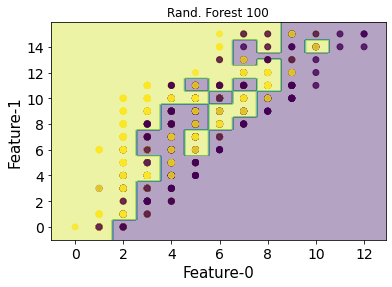

In [ ]:
#0th and 1st features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, RandomForestClassifier, 0, 1,"Rand. Forest 100","./decision boundaries/eye/rf100_0_1.pdf", n_estimators=100)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

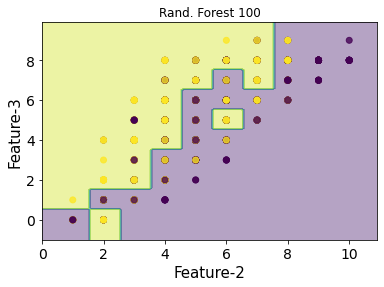

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, RandomForestClassifier, 2, 3,"Rand. Forest 100","./decision boundaries/eye/rf100_2_3.pdf", n_estimators=100)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

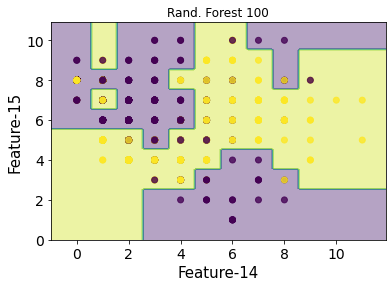

In [ ]:
#14th and 15th features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, RandomForestClassifier, 14, 15,"Rand. Forest 100","./decision boundaries/eye/rf100_14_15.pdf", n_estimators=100)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

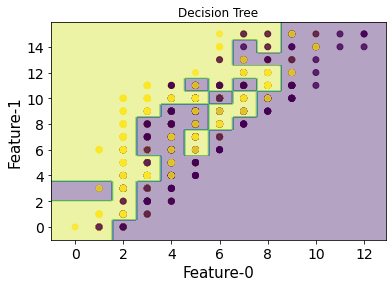

In [ ]:
#0th and 1st features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, DecisionTreeClassifier,0,1,"Decision Tree", "./decision boundaries/eye/decisionTree_0_1.pdf", )

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

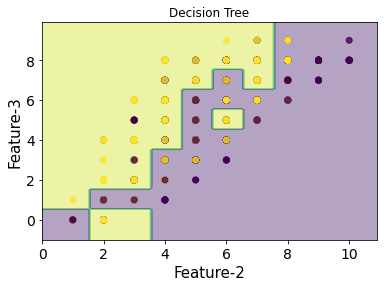

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, DecisionTreeClassifier,2,3,"Decision Tree", "./decision boundaries/eye/decisionTree_2_3.pdf")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

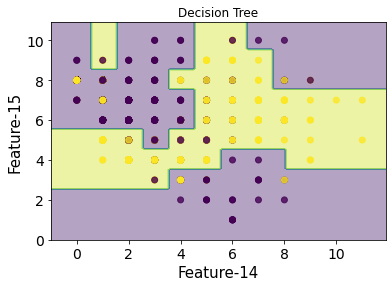

In [ ]:
#14th and 15th features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, DecisionTreeClassifier,14,15,"Decision Tree","./decision boundaries/eye/decisionTree_14_15.pdf")

#KNN's

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

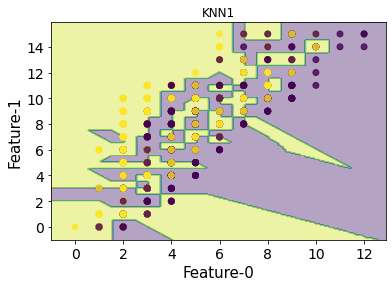

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, KNeighborsClassifier, 0, 1,"KNN1","./decision boundaries/eye/KNN1_0_1.pdf", n_neighbors=1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

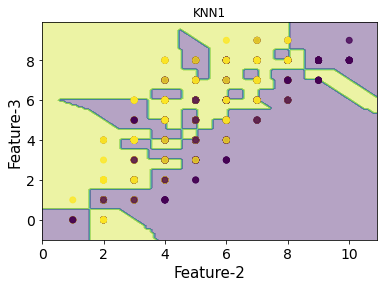

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, KNeighborsClassifier, 2, 3,"KNN1","./decision boundaries/eye/KNN1_2_3.pdf", n_neighbors=1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

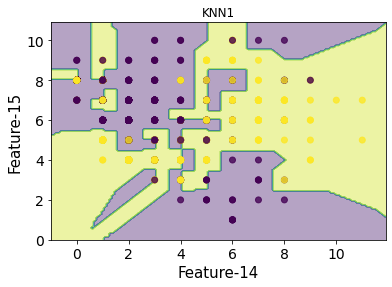

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, KNeighborsClassifier, 14, 15,"KNN1","./decision boundaries/eye/KNN1_14_15.pdf", n_neighbors=1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

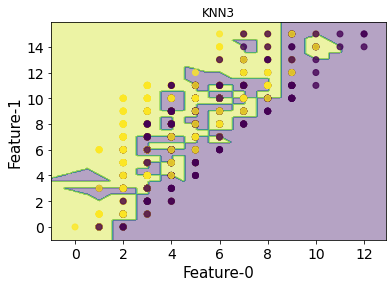

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, KNeighborsClassifier, 0, 1,"KNN3","./decision boundaries/eye/KNN3_0_1.pdf", n_neighbors=3)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

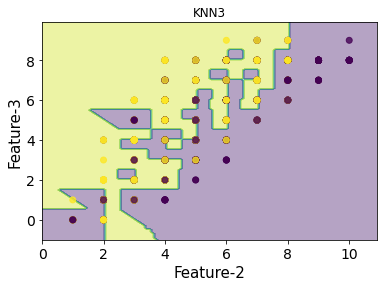

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, KNeighborsClassifier, 2, 3,"KNN3","./decision boundaries/eye/KNN3_2_3.pdf", n_neighbors=3)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

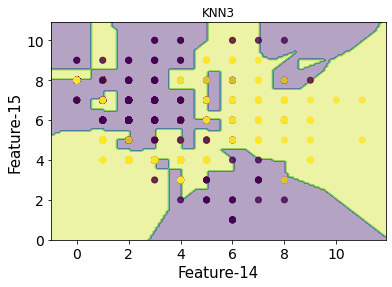

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, KNeighborsClassifier, 14, 15,"KNN3","./decision boundaries/eye/KNN3_14_15.pdf", n_neighbors=3)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

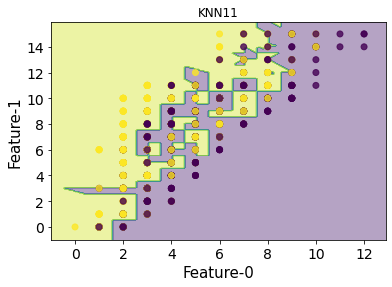

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, KNeighborsClassifier, 0, 1,"KNN11","./decision boundaries/eye/KNN11_0_1.pdf", n_neighbors=11)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

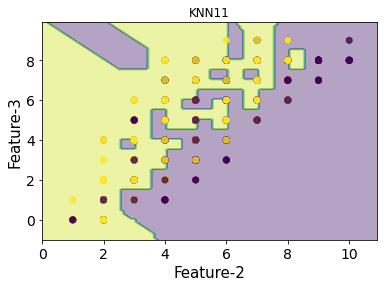

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, KNeighborsClassifier, 2, 3,"KNN11","./decision boundaries/eye/KNN11_2_3.pdf", n_neighbors=11)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

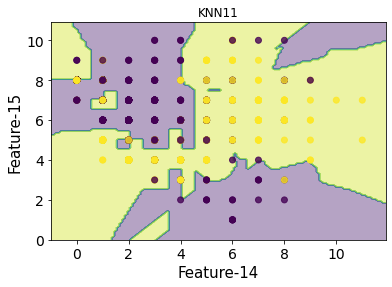

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, KNeighborsClassifier, 14, 15,"KNN11","./decision boundaries/eye/KNN11_14_15.pdf", n_neighbors=11)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

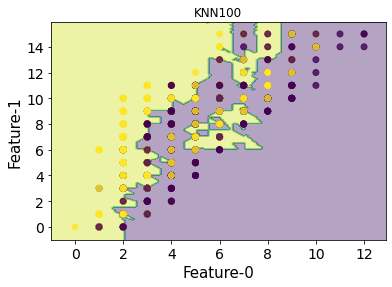

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, KNeighborsClassifier, 0, 1,"KNN100","./decision boundaries/eye/KNN100_0_1.pdf", n_neighbors=100)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

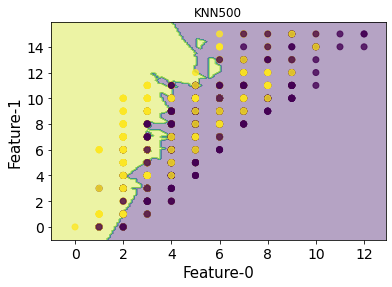

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, KNeighborsClassifier, 0, 1,"KNN500","./decision boundaries/eye/KNN500_0_1.pdf", n_neighbors=500)

#qda

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

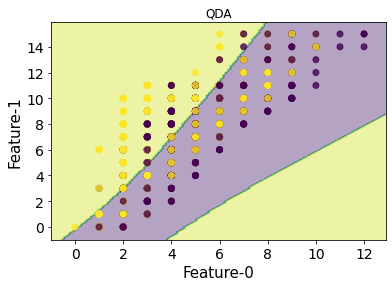

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, QuadraticDiscriminantAnalysis, 0,1, "QDA","./decision boundaries/eye/qda_0_1.pdf")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

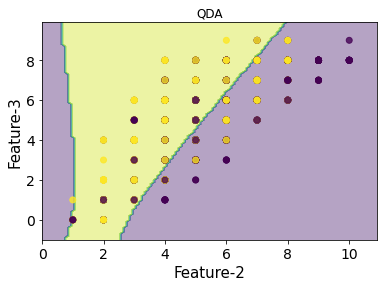

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, QuadraticDiscriminantAnalysis, 2,3, "QDA","./decision boundaries/eye/qda_2_3.pdf")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

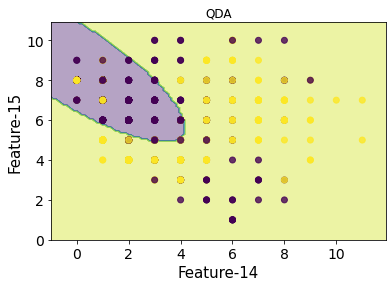

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, QuadraticDiscriminantAnalysis, 14,15,"QDA","./decision boundaries/eye/qda_14_15.pdf")

#adaboost

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

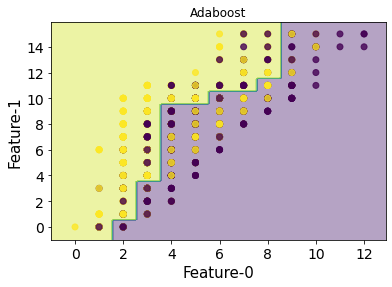

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, AdaBoostClassifier, 0,1,"Adaboost","./decision boundaries/eye/adaboost_0_1.pdf")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

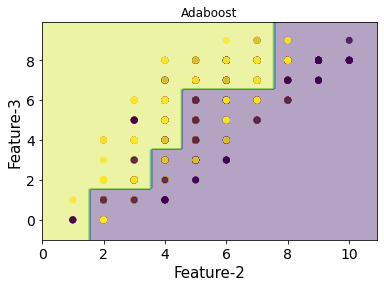

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, AdaBoostClassifier, 2,3,"Adaboost", "./decision boundaries/eye/adaboost_2_3.pdf")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

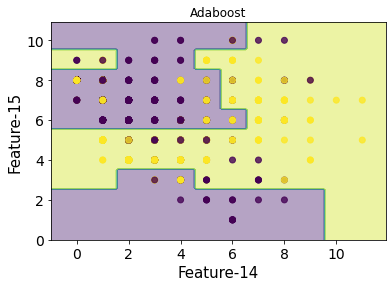

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, AdaBoostClassifier, 14,15,"Adaboost","./decision boundaries/eye/adaboost_14_15.pdf")

#gradient boost

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

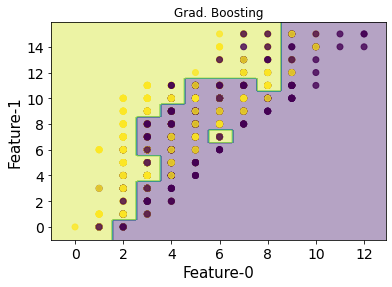

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, GradientBoostingClassifier, 0,1,"Grad. Boosting","./decision boundaries/eye/gradientBoost_0_1.pdf")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

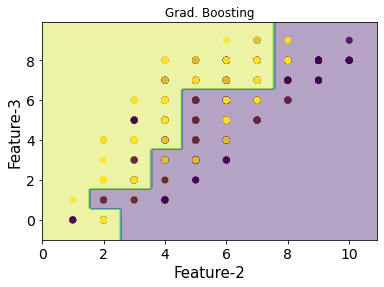

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, GradientBoostingClassifier, 2,3, "Grad. Boosting","./decision boundaries/eye/gradientBoost_2_3.pdf")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

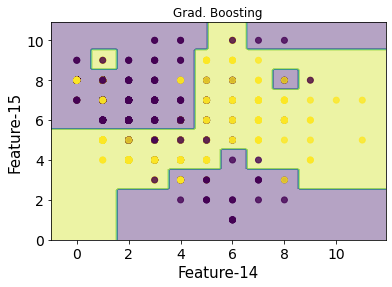

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, GradientBoostingClassifier, 14,15,"Grad. Boosting","./decision boundaries/eye/gradientBoost_14_15.pdf")

#logistic regression

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

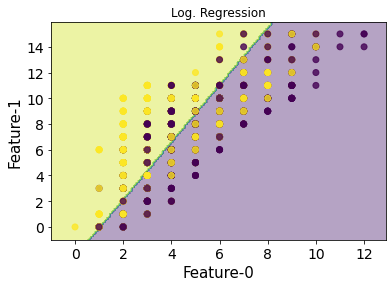

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, LogisticRegression, 0,1,"Log. Regression","./decision boundaries/eye/logisticRegression_0_1.pdf", max_iter=500)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

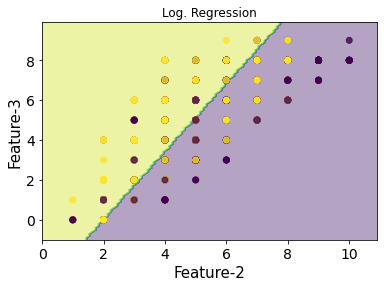

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, LogisticRegression, 2,3,"Log. Regression","./decision boundaries/eye/logisticRegression_2_3.pdf", max_iter=500)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

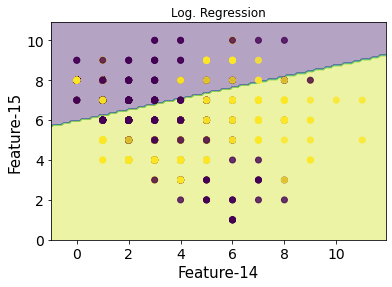

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, LogisticRegression, 14,15, "Log. Regression","./decision boundaries/eye/logisticRegression_14_15.pdf",max_iter=500)

#svc kernel linear

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

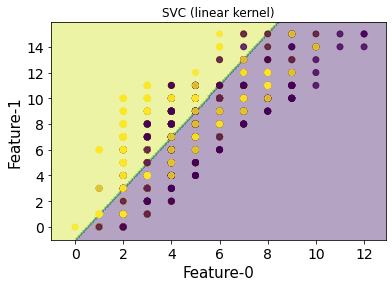

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, SVC, 0,1,"SVC (linear kernel)","./decision boundaries/eye/SVC_linear_kernel_0_1.pdf", kernel="linear")


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

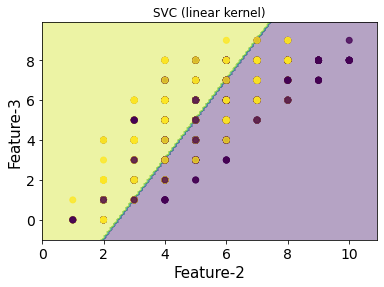

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, SVC, 2,3,"SVC (linear kernel)", "./decision boundaries/eye/SVC_linear_kernel_2_3.pdf", kernel="linear")


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

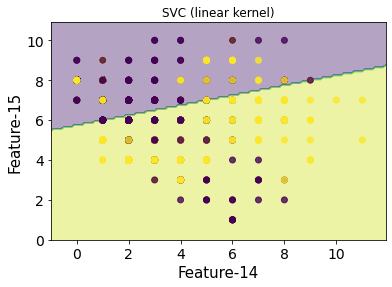

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, SVC, 14,15,"SVC (linear kernel)","./decision boundaries/eye/SVC_linear_kernel_14_15.pdf", kernel="linear")


#linearsvc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

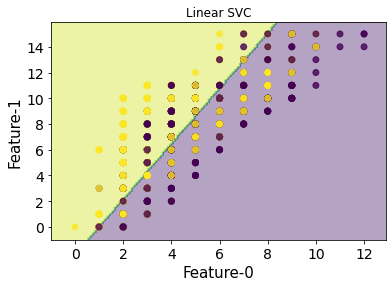

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, LinearSVC, 0,1,"Linear SVC","./decision boundaries/eye/linearSVC_0_1.pdf")


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

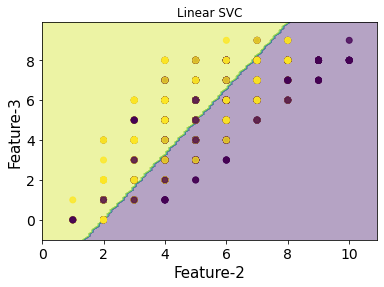

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, LinearSVC, 2,3, "Linear SVC","./decision boundaries/eye/linearSVC_2_3.pdf")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

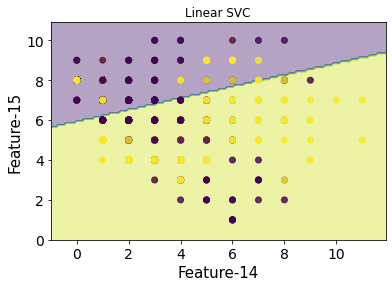

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, LinearSVC, 14,15,"Linear SVC", "./decision boundaries/eye/linearSVC_14_15.pdf")


#MLP1

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

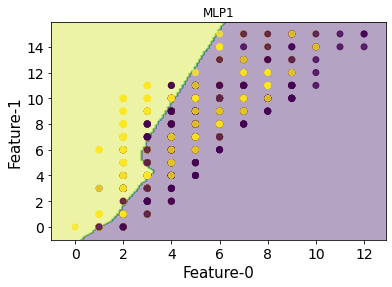

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, MLPClassifier, 0,1,"MLP1","./decision boundaries/eye/MLP1_0_1.pdf",max_iter=500)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

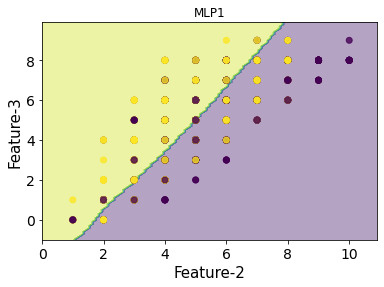

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, MLPClassifier, 2,3,"MLP1","./decision boundaries/eye/MLP1_2_3.pdf", max_iter=500)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

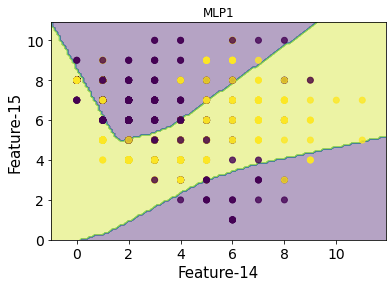

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, MLPClassifier, 14,15,"MLP1","./decision boundaries/eye/MLP1_14_15.pdf",max_iter=500)


#MLP3

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

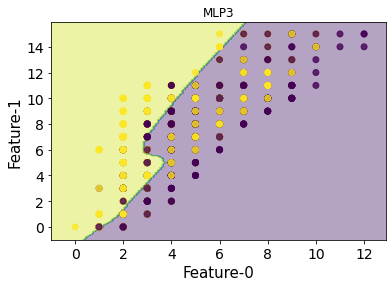

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, MLPClassifier, 0,1, "MLP3","./decision boundaries/eye/MLP3_0_1.pdf",hidden_layer_sizes=(150,100,50), max_iter=500)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

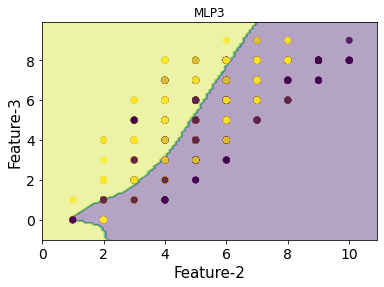

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, MLPClassifier, 2,3, "MLP3","./decision boundaries/eye/MLP3_2_3.pdf", hidden_layer_sizes=(150,100,50), max_iter=500)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

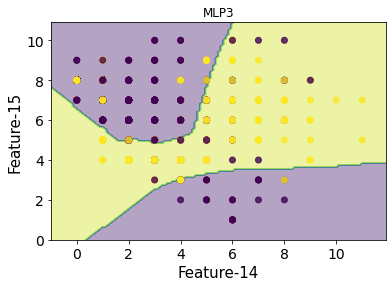

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, MLPClassifier, 14,15,"MLP3","./decision boundaries/eye/MLP3_14_15.pdf", hidden_layer_sizes=(150,100,50), max_iter=500)

#MLP5

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

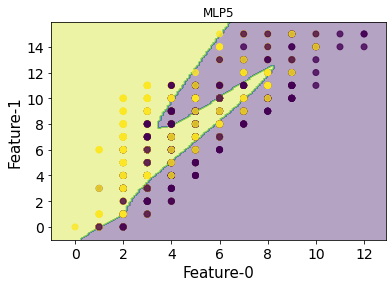

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, MLPClassifier, 0,1,"MLP5", "./decision boundaries/eye/MLP5t1_0_1.pdf",hidden_layer_sizes=(250, 200, 150,100,50), max_iter=500)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

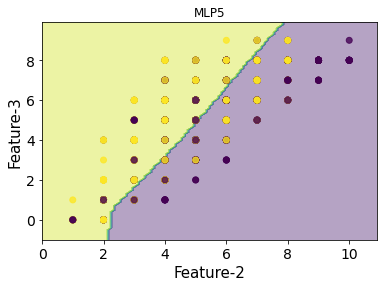

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, MLPClassifier, 2,3,"MLP5","./decision boundaries/eye/MLP5t1_2_3.pdf",  hidden_layer_sizes=(250, 200, 150,100,50), max_iter=500)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

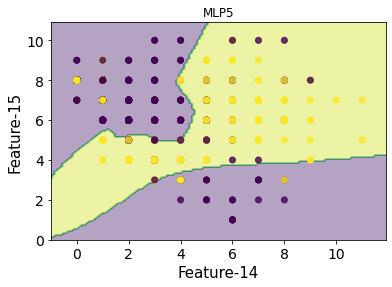

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, MLPClassifier, 14,15,"MLP5","./decision boundaries/eye/MLP5t1_14_15.pdf", hidden_layer_sizes=(250, 200, 150,100,50), max_iter=500)

#MLP5 second try

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

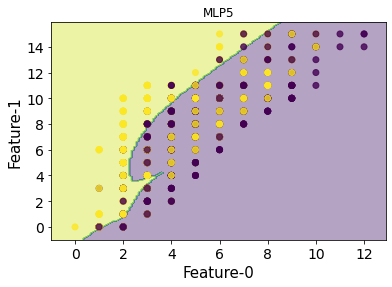

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, MLPClassifier, 0,1, "MLP5","./decision boundaries/eye/MLP5t2_0_1.pdf",hidden_layer_sizes=(150,100,50,25,5), max_iter=500)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

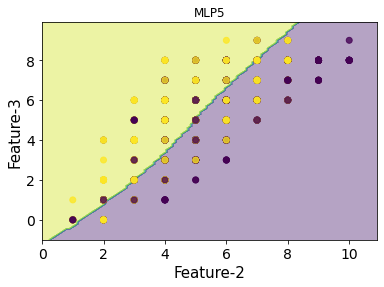

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, MLPClassifier, 2,3, "MLP5","./decision boundaries/eye/MLP5t2_2_3.pdf", hidden_layer_sizes=(150,100,50,25,5), max_iter=500)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

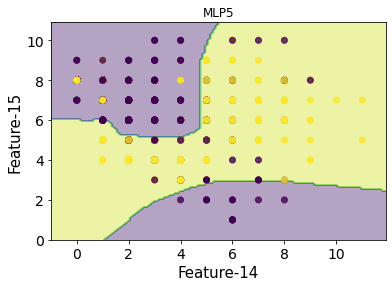

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, MLPClassifier, 14,15,"MLP5","./decision boundaries/eye/MLP5t2_14_15.pdf", hidden_layer_sizes=(150,100,50,25,5), max_iter=500)

#Naive Bayes

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

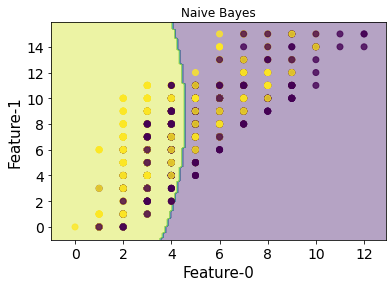

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, GaussianNB, 0,1,"Naive Bayes","./decision boundaries/eye/naiveBayes_0_1.pdf")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

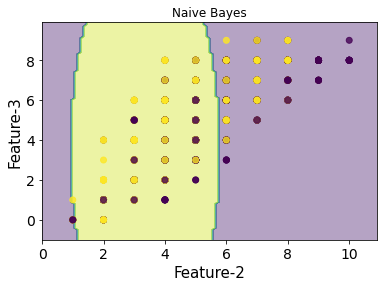

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, GaussianNB, 2,3,"Naive Bayes","./decision boundaries/eye/naiveBayes_2_3.pdf")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

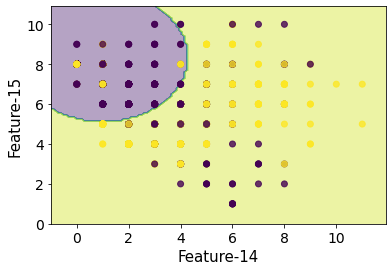

In [ ]:
#2nd and 3rd features
dataset = pd.read_csv("EEG_Eye_State.csv", header = None)
values = dataset.values
X, y = values[:, :-1], values[:, -1]
plot_decision_boundaries(X, y, GaussianNB, 14,15,"Naive Bayes","./decision boundaries/eye/naiveBayes_14_15.pdf")

#SVC rbf kernel